# Introduction

This dataset includes the list of games with sales recorded over 100,000 copies over different platforms and continents. It contains data for over 16,500 games from 1980 to 2016. This dataset was generated by scrape from  [VGChartz](https://www.vgchartz.com/).



# Question

To narrow down to answering my main question, I have to explore what other factors in my dataset affects sale records of a game?

- Factors such as: 
   1. Platform
   2. Genre
   3. Publisher
   
Find out which factors has done better overall in terms of sale records will help me answer the main questions:

**Does publishing more games in any given genre leads to a high sale records?**  

# Dataset

This dataset has 11 unique columns.

- Rank : Rank the games according to best overall sales records
- Name : Name of the game
- Platform : Name of the platform (i.e. PS2, PS3, PC,..) on which the game was released.
- Year : The year in which the games was released
- Genre : Genre of the game
- Publisher : Publisher of the game
- NA_Sales : Game's sale record in North America (in millions)
- EU_Sales : Game's sale record in Europe (in millions)
- JP_Sales : Game's sale record in Japan (in millions)
- Other_Sales : Game's sale record in Other parts of the world (in millions)
- Global_Sales : Game's sale record worldwide (in millions)

In [65]:
## why are we using boxplot and countplot?
from Scripts import project_functions as pf
from Scripts import groupby_function as gf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# This will load data, remove the missing data and reset the index
df = pf.load_and_process("../data/raw/vgsales.csv")
# exporting the process data to a folder
df.to_csv("../data/processed/processed_vgsales.csv")
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16286  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16287  16597                     Men in Black II: Alien Escape       GC   
16288  16598  SCORE International Baja 1000: The Official Game      PS2   
16289  16599                                        Know How 2       DS   
16290  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16286  2002.0      Platform       Kemco      0.01      0.00      0.00   
16287  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16288  2008.0        Racing  Activision      0.00      0.00      0.00   
16289  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16290  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16286         0.00          0.01  
16287         0.00          0.01  
16288         0.00          0.01  
16289         0.00          0.01  
16290         0.00          0.01  

[16291 rows x 11 columns]

# Exploratory Data Analysis with observations

**Which platform has the best total global sales?**

Platform  Global_Sales
0       PS2       1233.46
1      X360        969.60
2       PS3        949.35
3       Wii        909.81
4        DS        818.91
5        PS        727.39
6       GBA        305.62
7       PSP        291.71
8       PS4        278.10
9        PC        254.70
10       GB        254.42

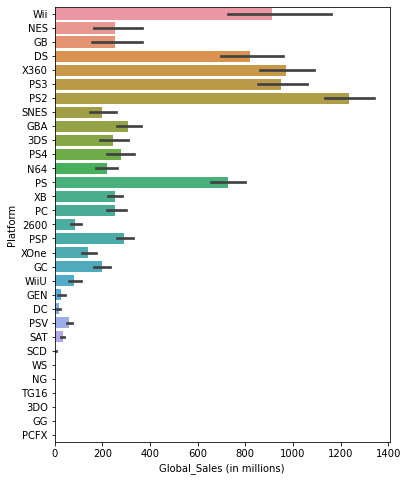

In [64]:
col_list = ['Platform', 'Global_Sales']
df2 = (
    df.groupby(['Platform']).sum()
    .sort_values('Global_Sales', ascending = False)
    .reset_index(col_level = 1)
)
df2 = df2[col_list]
fig, ax = plt.subplots(figsize=(6,8))
sns.barplot(x='Global_Sales', y= 'Platform', data = df, estimator = np.sum)
plt.xlabel('Global_Sales (in millions)')
df2.head(11)

Observations:


- As we can see the PS2 has highest total game sales globally

**Let's also see which platform has highest sale record in other part of the worlds?**

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Platform                                           
2600         80.78      4.86      0.00         0.84
3DO           0.00      0.00      0.10         0.00
3DS          78.03     58.29     97.30        12.55
DC            5.43      1.69      8.56         0.27
DS          388.53    194.05    175.02        60.29
GB          113.64     47.51     85.12         8.16
GBA         178.43     72.49     46.56         7.51
GC          131.94     38.32     21.34         5.13
GEN          19.27      5.52      2.67         0.89
GG            0.00      0.00      0.04         0.00
N64         138.91     41.03     33.76         4.31
NES         125.94     21.15     98.65         5.31
NG            0.00      0.00      1.44         0.00
PC           92.04    137.35      0.17        24.33
PCFX          0.00      0.00      0.03         0.00
PS          334.71    212.38    139.78        40.69
PS2         572.92    332.63    137.54       190.47
PS3         388.90    340.47     79.21       140.81
PS4          96.80    123.70     14.30        43.36
PSP         107.09     67.16     75.89        41.52
PSV          16.07     16.27     20.86         8.41
SAT           0.72      0.54     32.26         0.07
SCD           1.00      0.36      0.45         0.05
SNES         61.23     19.04    116.55         3.22
TG16          0.00      0.00      0.16         0.00
WS            0.00      0.00      1.42         0.00
Wii         497.37    264.35     68.28        79.20
WiiU         38.32     24.23     12.79         6.45
X360        594.33    278.00     12.30        84.67
XB          182.06     59.65      1.38         8.48
XOne         83.19     45.65      0.34        11.92

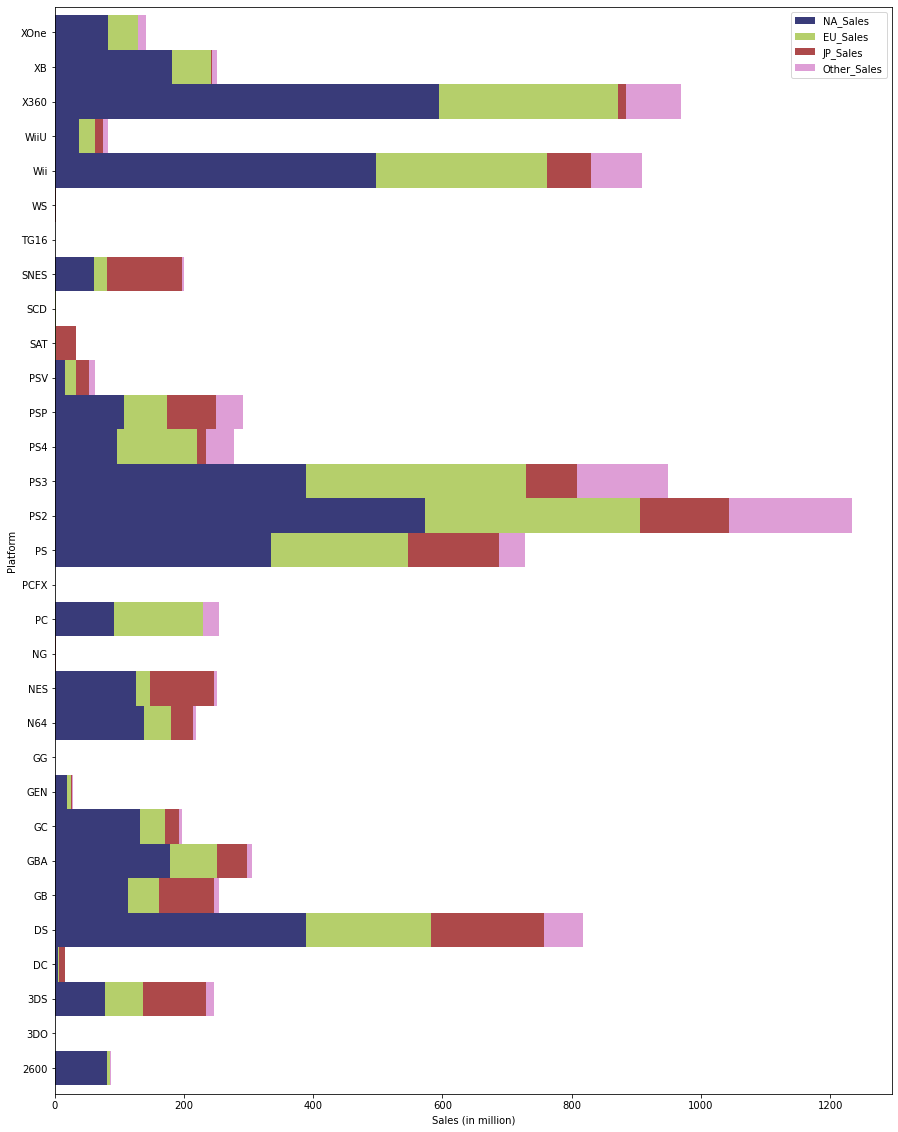

In [63]:
df3 = df.groupby(['Platform']).sum()
columns = ['Rank', 'Year', 'Global_Sales']
df3.drop(columns, inplace = True, axis=1)
ax = df3.plot(kind = "barh", figsize=(15,20), width = 1, stacked = True, colormap = "tab20b")
ax.set_xlabel("Sales (in million)")
df3

Observation:

- Xbox has the highest total game sales in North America.
- PS3 has the highest total game sales in Europe.
- DS has the highest total game sales in Japan.
- PS2 has the highest total game sales in other parts of the world.


PC has been used worldwide but yet it is not the best perfroming platform. One of the reason I think is that PC games have been facing problem with pirating. Other platform like PS, GB, NES and Xbox it is tough to pirate games.Therefore, many games company sales record are not too high for PC.

**Which publisher has good sales record throughout years globally? (As there many publisher! let's take top 15)**

Publisher  Global_Sales
0                                 Nintendo       1784.43
1                          Electronic Arts       1093.39
2                               Activision        721.41
3              Sony Computer Entertainment        607.28
4                                  Ubisoft        473.54
5                     Take-Two Interactive        399.30
6                                      THQ        340.44
7             Konami Digital Entertainment        278.56
8                                     Sega        270.70
9                       Namco Bandai Games        253.65
10                  Microsoft Game Studios        245.79
11                                  Capcom        199.95
12                                   Atari        146.77
13                             Square Enix        144.73
14  Warner Bros. Interactive Entertainment        142.34

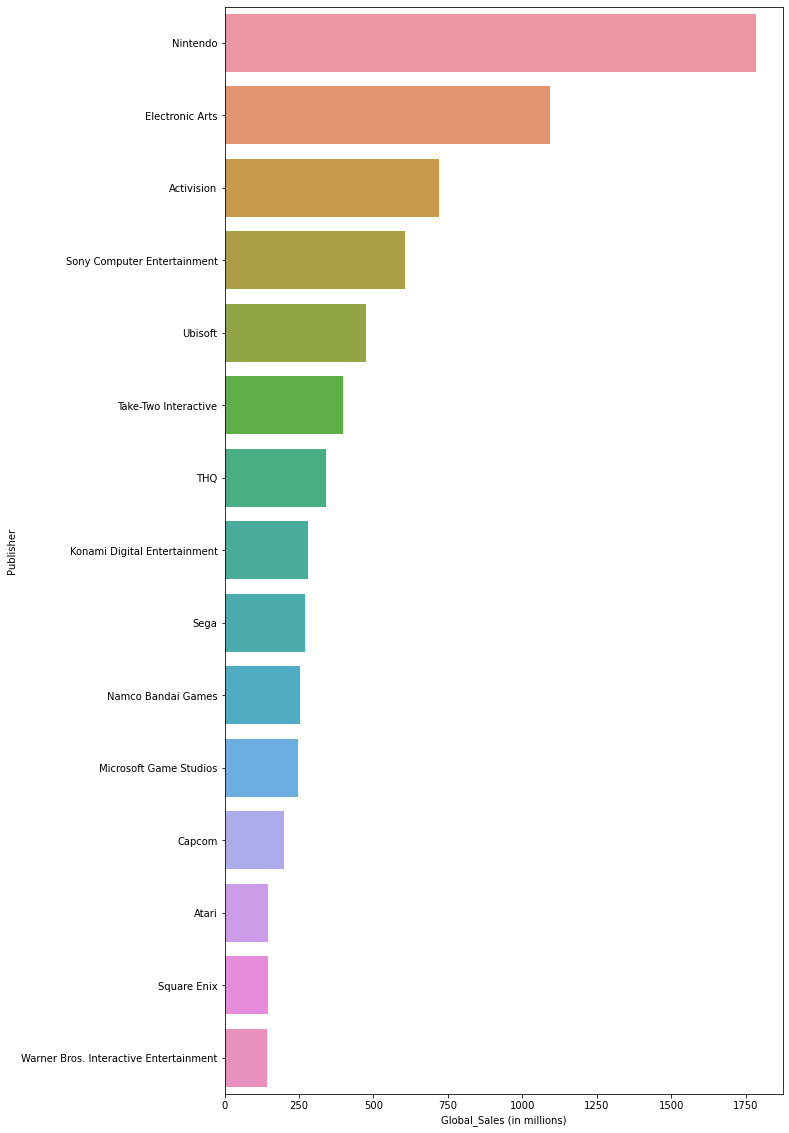

In [66]:
df3 = (df.groupby(['Publisher']).sum()
       .sort_values('Global_Sales', ascending = False)
       .reset_index(col_level = 1)
      )
top15 = df3.head(15)
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x='Global_Sales', y='Publisher', data = top15)
plt.xlabel('Global_Sales (in millions)')
col = ['Publisher', 'Global_Sales']
top15[col]

Observation:

- As we can see that Nintendo has the highest global sales

**Which Genre has been dominating the gaming industry globally?**

Text(0.5, 0, 'Global_Sales (in millions)')

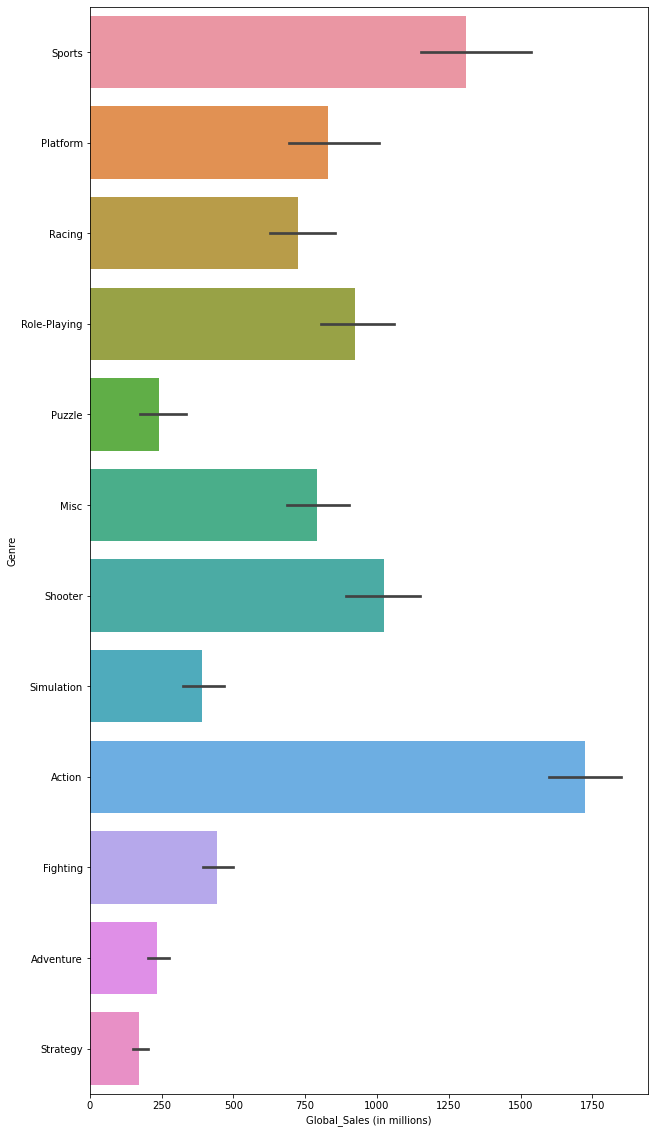

In [8]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x='Global_Sales', y='Genre', data = df, estimator = np.sum)
plt.xlabel('Global_Sales (in millions)')

Observation:

- Action has been taking over the gaming industry.


# Analysis

As of now we have seen which platform, publisher and Genre has the most game sales record. Now, we are going to focus on the main question Does pubishing more games in a dominating genre leads to higher sale of games?

**Let's count the number of games published by each publisher**

In [9]:
df5 = df.groupby(['Publisher']).count()
df5 = df5.sort_values('Global_Sales', ascending = False)
df5 = df5.rename(columns={"Rank": "No. of Games Published"})
col = ['No. of Games Published']
df5[col].head(15)

No. of Games Published
Publisher                                                     
Electronic Arts                                           1339
Activision                                                 966
Namco Bandai Games                                         928
Ubisoft                                                    918
Konami Digital Entertainment                               823
THQ                                                        712
Nintendo                                                   696
Sony Computer Entertainment                                682
Sega                                                       632
Take-Two Interactive                                       412
Capcom                                                     376
Atari                                                      347
Tecmo Koei                                                 338
Square Enix                                                231
Warner Bros. Interactive Entertainment                     217

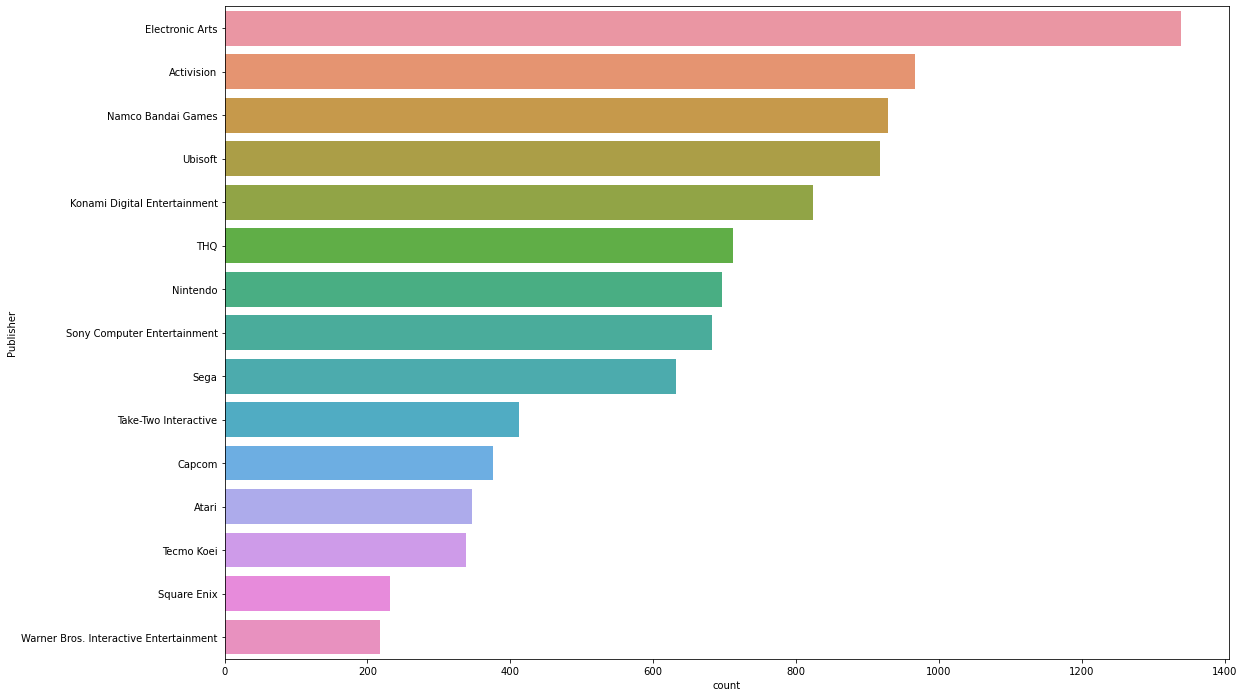

In [10]:
fig, ax = plt.subplots(figsize=(18,12))
sns.countplot(y='Publisher', data=df,order=df.Publisher.value_counts().iloc[:15].index)

As we can see that Electronic Arts has the most number of game published.

**Let's see which publisher has released the most amount of action games?**

As we saw before, Action genre has the highest sales recorded. Therefore, we are trying to find if which publisher has published the most action genre games. Does that publisher has the highest sale records?

In [67]:
col = ['Name', 'Publisher', 'Genre']
df6 = df[col]
df6 = df6[df6['Genre'].str.match('Action')]
df6 = ( df6.reset_index(col_level = 1)
       .drop(['index'], axis = 1)
      )
df6

Name  \
0                                    Grand Theft Auto V   
1                         Grand Theft Auto: San Andreas   
2                                    Grand Theft Auto V   
3                           Grand Theft Auto: Vice City   
4                                  Grand Theft Auto III   
...                                                 ...   
3246      Original Frisbee Disc Sports: Ultimate & Golf   
3247  Fujiko F. Fujio Characters: Great Assembly! Sl...   
3248                                    Planet Monsters   
3249                                     Carmageddon 64   
3250  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...   

                      Publisher   Genre  
0          Take-Two Interactive  Action  
1          Take-Two Interactive  Action  
2          Take-Two Interactive  Action  
3          Take-Two Interactive  Action  
4          Take-Two Interactive  Action  
...                         ...     ...  
3246  Destination Software, Inc  Action  
3247         Namco Bandai Games  Action  
3248                      Titus  Action  
3249         Virgin Interactive  Action  
3250            dramatic create  Action  

[3251 rows x 3 columns]

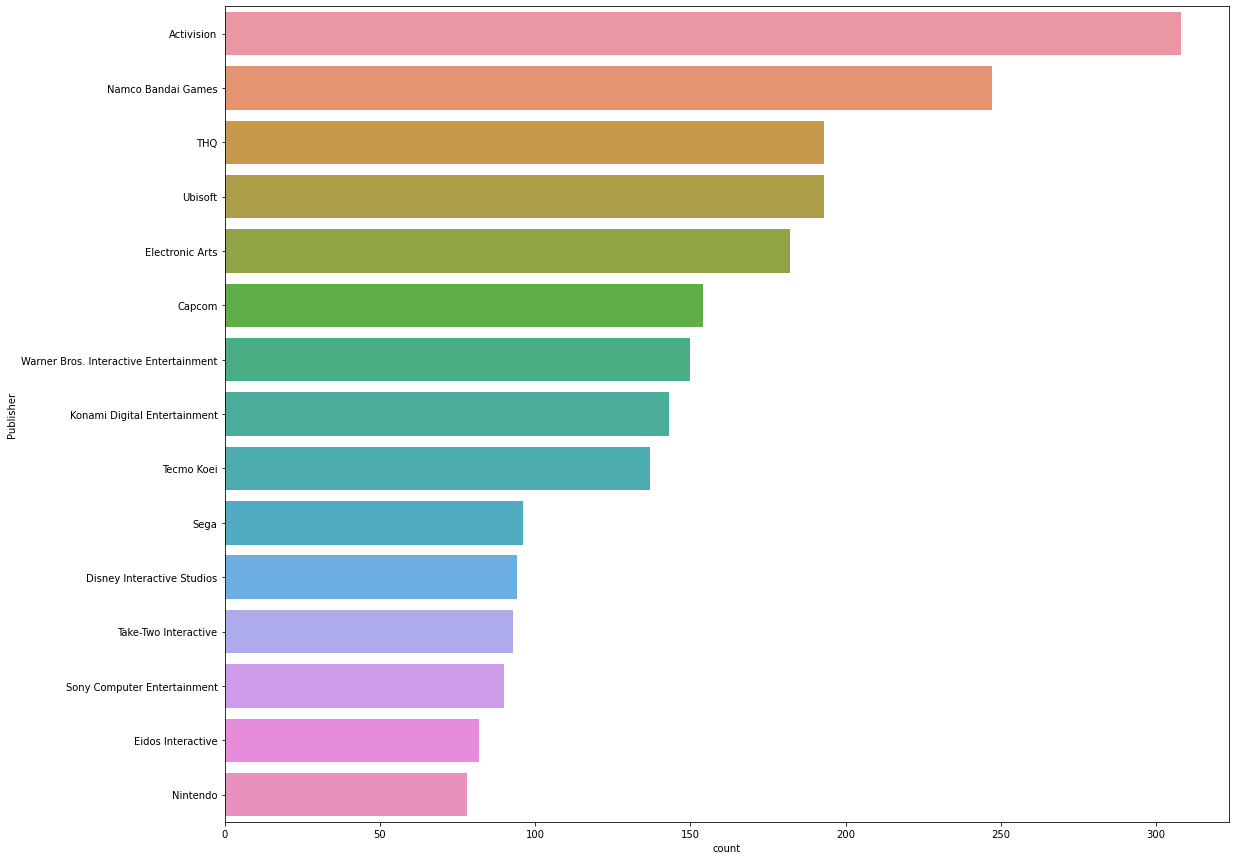

In [12]:
fig, ax = plt.subplots(figsize=(18,15))
sns.countplot(y='Publisher', data=df6,order=df6.Publisher.value_counts().iloc[:15].index)

As from the countplot above, we can observe that **Activision** has the most amount of action games published. However, they are third on the list of highest global sales.

As of now, we know that in terms of sales record:
- **PS2** is best platform 
- Best publisher is **Nintendo** 
- Best Genre is **Action** 
- Most game is published by **EA**
- Most action games published by **Activision**

One of the fun fact which will help us answer the main question is that almost all of the games made by Nintendo was on avaliable to only consoles by Nintendo themselves (i.e. Wii U, Wii, SNES, ...).

Therefore, we lead to one more question:

**How many Action based games were published by Activision on PS2?**

As our main question is **Does publishing more games in a given genre leads to a high sale records?**

As Activison as published the most action games, we will check what is the sale records of Activision publishing action based games on PS2 which is the best performing platform.

In [20]:
df7 = df[df['Genre'].str.match('Action')]
df7 = df7[df7['Platform'].str.match('PS2')]
df7 = df7[df7['Publisher'].str.match('Activision')]
df7 = df7.groupby(['Platform']).sum()
col = ['Global_Sales']
df7[col]

Global_Sales
Platform              
PS2              22.34

In [36]:
df8 = df[df['Genre'].str.match('Action')]
df8 = df8[df8['Publisher'].str.match('Activision')]
df8 = df8[df8['Platform'].str.match('PS2')]
df8 = df8.groupby(['Platform']).count()
df8 = df8.rename(columns={"Name": "No. of Action Games"})
col = ['No. of Action Games']
df8[col]

No. of Action Games
Platform                     
PS2                        28

In [8]:
df10 = df[df['Genre'].str.match('Action')]
df10 = df10[df10['Publisher'].str.match('Activision')]
df10 = df10.groupby(['Publisher']).sum()
col = ['Global_Sales']
df10[col].head(1)

Global_Sales
Publisher               
Activision        141.82

Activision has global sales of 141.82 (in millions) of action based games across all platforms.


Activision has published 310 action games. Out of 310, 28 were released on PS2.

In [ ]:
(28/310)*100

That's 9%. That 28 games on PS2 has made 22.34 (in million).

In [ ]:
(22.34/141.82)*100

That's 15.75%.

We have to find how many action games have Activision has published on other platforms and their global sale record and compare it with PS2 sales record. 

In [24]:
df11 = df[df['Genre'].str.match('Action')]
df11 = df11[df11['Publisher'].str.match('Activision')]
df11 = df11.groupby(['Platform']).count()
col = ['Rank']
df11 = df11[col]
df11 = df11.rename(columns={'Rank':'No. of the game published'})
df11

No. of the game published
Platform                           
2600                             11
3DS                              15
DS                               37
GBA                              18
GC                               11
N64                               2
PC                               16
PS                                7
PS2                              28
PS3                              36
PS4                               9
PSP                              11
PSV                               1
Wii                              33
WiiU                              9
X360                             43
XB                               15
XOne                              8

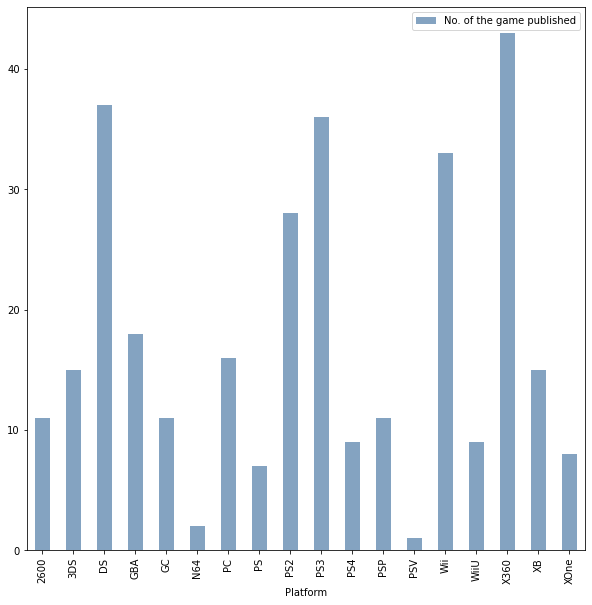

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
line = df11.plot(kind = "bar", ax=ax, color=(0.2, 0.4, 0.6, 0.6))

In [37]:
df14 = df[df['Genre'].str.match('Action')]
df14 = df14[df14['Publisher'].str.match('Activision')]
df14 = df14.groupby(['Platform']).sum()
df14 = df14.rename(columns={'Global_Sales':'Global_Sales (in millions)'})
col = ['Global_Sales (in millions)']
df14 = df14[col]
df14

Global_Sales (in millions)
Platform                            
2600                            4.43
3DS                             2.87
DS                             15.88
GBA                             6.29
GC                              4.23
N64                             0.79
PC                              0.97
PS                              8.00
PS2                            22.34
PS3                            15.82
PS4                             2.12
PSP                             3.38
PSV                             1.69
Wii                            18.65
WiiU                            2.15
X360                           23.76
XB                              7.79
XOne                            1.19

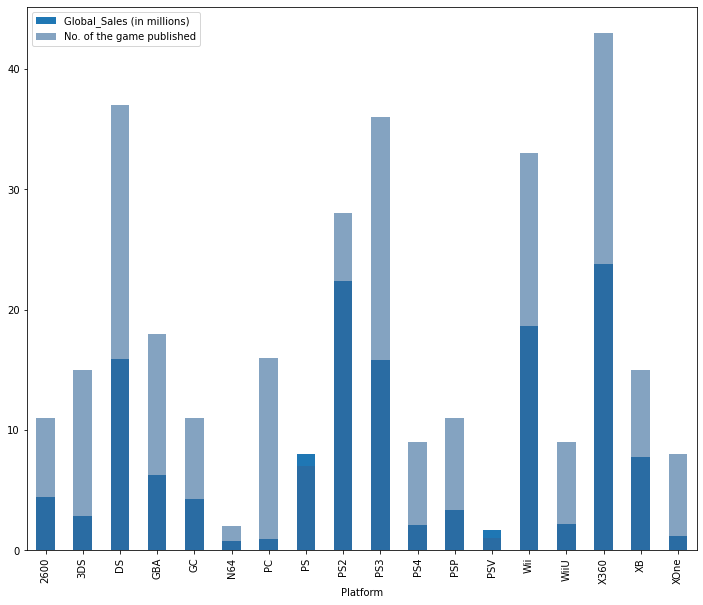

In [38]:
fig, ax = plt.subplots(figsize=(12,10))
line1 = df14.plot(kind = "bar",ax =ax,)
line = df11.plot(kind = "bar", ax=ax,color=(0.2, 0.4, 0.6, 0.6))

# Conclusion

As we can see from the last graph in analysis we found that:

- PS2 being the best platform have sale record of 22.34 millions from 28 action based games.
- X360 has the sale record of 23.76 millions from 43 action based games.
- Wii has the sale record of 18.65 millions from 33 action based games.

As you see all 3 platform mentioned in the list above represent different company.

- PS2 represents PlayStation.
- X360 represents Microsoft.
- Wii represents Nintendo.

The answer to my question **Does publishing more games in any given genre leads to a high sale records?**
Well, it does not. Publishing more games in action genre does not lead to higher sale record. The reason behind it is that factor like platform matters. As we see that PS2 sale records of 22.34 million from just 28 action games, while PS3 which is the next generation platform of same comapny PlayStation has sale records of 15.82 millions from 36 action games! So, does game itself! Publisher like Activision have to make sure that their games are entertaining in the genre which they are dominating. Therefore, all the factors do affects the outcome of the main question! 